In [53]:
# p189 실습
# 아래는 당뇨병 발병 원인과 관련된 데이터이다. 예측 모델을 이용하여 얻은 예측값으로 MSE, RMSE, MAE 그리고 MAPEFMF를 계산하시오.
# 데이터 : DIABETES.csv (변수 : 11, 자료 수 : 443개)

# 1. 데이터 구성하기
# 2. 에측 모델 생성(회귀분석, 의사결정나무, 랜덤 포레스트, 그래디언트 부스팅)
# 3. 예측 및 평가
# 4. 시각화

import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt # 데이터 시각화
import matplotlib

from sklearn.model_selection import train_test_split # 데이터 분할 train, test
import statsmodels.formula.api as smf # 회귀분석
from sklearn.tree import DecisionTreeRegressor # 의사결정계수
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트
from sklearn.ensemble import GradientBoostingRegressor # 그레디언트 부스트

# 평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.tree import export_graphviz
import graphviz

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [55]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/DIABETES.csv", encoding = 'euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [56]:
# 범주형 변수의 Dummy 변수화
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

# 머신러닝 할 때 기계가 이해할 수 있도록 모든 데이터를 수치로 변환해주는 전처리 작업이 필수적이다.
# 숫자가 아닌 objcet형의 데이터들이 있다면
# 1. 먼저 수치형 데이터로 변환을 해주고 (0, 1, 2, 3..)
# 2. 그다음 수치화된 데이터를 가변수화하여 나타내 준다면
# -> 기계학습에 적합한 데이터의 형태로 가공된다.
# 그런데 왜 수치형 데이터로만 바꾸면 될텐데 굳이 더미로 가변수화 해야하는 걸까?
# 왜냐하면 수치형 데이터로만 변환을 하게 되면 서로 간의 관계성이 생기게 된다.
# 따라서 서로 무관한 수, 즉 더미로 만든 가변수로 변환함으로서 그러한 문제를 막아준다.
# pandas에서는 손쉽게 더미의 가변수를 만들 수 있도록 get_dummies 함수를 제공
# dummy = True : NAN을 생성하여 결측값도 인코딩하여 처리

# 더미를 만들 건데 데이터프레임을 결측값을 처리하여 더미값을 만들어낸다.

# 밑에 결과를 보면 GENDER가 object형인데 더미값으로 수치화된 데이터로 변환된 것을 확인할 수 있다.

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [57]:
# 목표변수, 설명변수 데이터 지정

df_raw_y = df_raw_dummy["Y"] # Y열을 df_rwa_y에 저장 swap처럼
df_raw_x = df_raw_dummy.drop("Y", axis = 1, inplace = False)
 # Y열 제거 하고 열을 저장 안한다.
# inplace = False 저장안함                                  
# inplace = true 저장함

# train_test_split(X: 설명변수 데이터, Y : 목표변수 데이터, test_size = test 데이터 비율, random_state : random seed)
df_train, df_test = train_test_split(df_raw_dummy, test_size = 0.3, random_state = 1234)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


In [58]:
# 예측 모델 생성
# - 모델별 변수 및 파라미터는 교육과정에서 최종 선정된 결과를 활용

# 회귀모델
lr_model = smf.ols(formula = "Y ~ BMI + LTG + BP + GLUCOSE + HDL", data = df_train)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     59.48
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           5.06e-43
Time:                        02:01:45   Log-Likelihood:                -1679.0
No. Observations:                 309   AIC:                             3370.
Df Residuals:                     303   BIC:                             3392.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -282.2815     45.354     -6.224      0.0

In [59]:
# 의사결정 계수
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4 )
dt_model.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

In [60]:
# 랜덤 포레스트
rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6,
                                 min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

In [61]:
# 그래디언트 부스트
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11, 
                                     min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [62]:
# 예측 및 평가

# 모델 리스트, 그래프를 그리기 생성 목적
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]

# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

In [63]:
# 회귀분석
# 예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['Y'], lr_y_pred))
rmse.append(mean_squared_error(df_test_y, lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Y'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Y'], lr_y_pred))

In [64]:
# 의사결정나무
# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [65]:
# 랜덤포레스트
# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [66]:
# 그래디언트 부스팅
# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

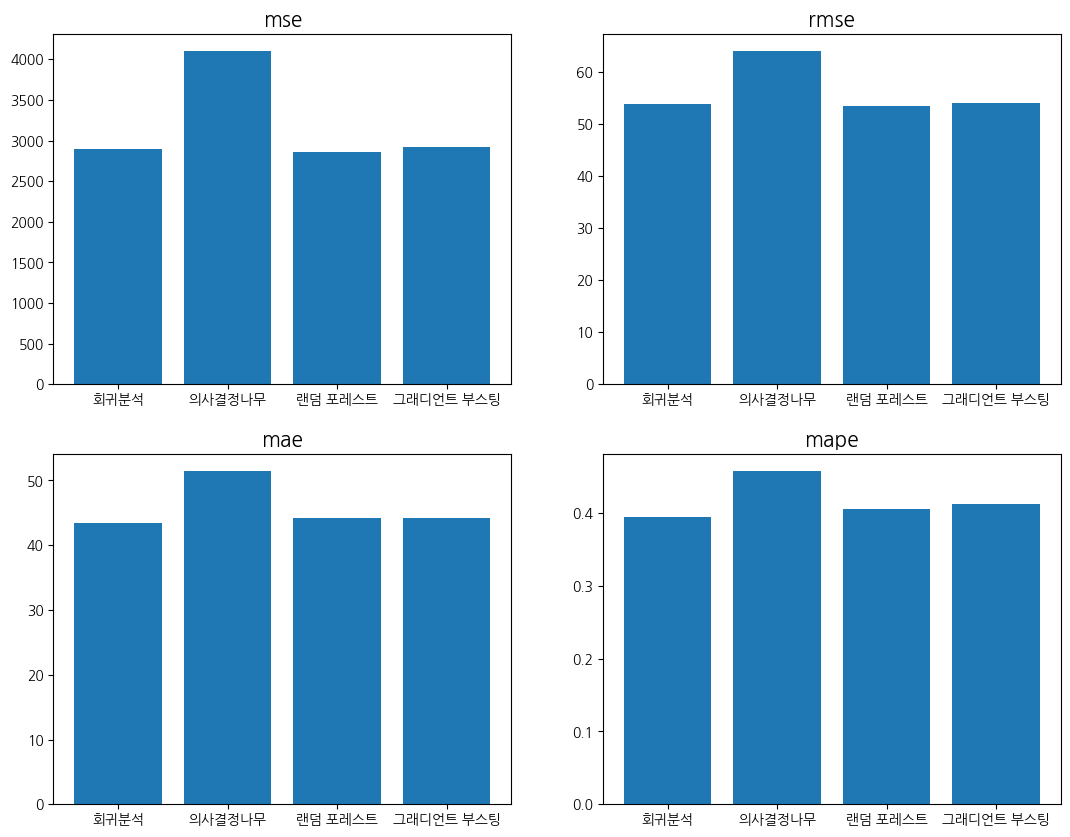

In [67]:
# 시각화 - 평가
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

# 일반Regression으로 선택된 설명변수를 이용한 선형회귀모델의 정확도가 가장 높고, 반면에 의사결정나무 모델의
# 성능이 가장 미흡하며, 평가지표별 모델의 정확도 추세는 유사하게 나타남

In [68]:
# p219 실습
# 아래는 붓꽃의 품종 특성 데이터이다. 꽃잎 및 꽃받침 길이와 넓이 자료를 이용해서 주성분 분석을 실시하고 결과를 해석하시오.
# 데이터 : IRIS.csv (변수 : 5개, 자료 수 : 150개)

# 1 . 데이터 구성하기
# 2. 선형관계 확인 : 산점도 행렬, 상관계수
# 3. 데이터 확인 및 Scaling
# 4. 주성분 분석 및 결과 : 주성분 점수, 고유벡터, 기여율 등
# 5. 주성분 상관분석
# 6. 주성분 결과 탐색 : 품종별 입력 / 주성분 변수 분포 (산점도 등)

import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np # 행렬 연산
import matplotlib # 데이터 시각화
import matplotlib.pyplot as plt 
import seaborn as sns # 데이터 시각화 : 추세, 산점도 행렬

from sklearn.preprocessing import StandardScaler # Scale 변환 : 평균, 표준편차 기준

from sklearn.decomposition import PCA # 주성분 분석

import statsmodels.api as sm # 회귀분석

%matplotlib inline

In [69]:
# 데이터 구성하기

df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/IRIS.csv")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
# 데이터 분리(Y, Xs) -> 설명변수를 이용한 주성분 분석

df_raw_x = df_raw.drop("SPECIES", axis = 1)
df_raw_y = df_raw["SPECIES"]
df_raw_y.head()

# 주성분 회귀분석의 목표변수
# df_raw_y = 주성분 회귀분석의 목표변수
# df_raw_x = 주성분 분석 입력변수

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: SPECIES, dtype: object

In [71]:
df_raw_x.head()
# 주성분 분석 입력변수

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


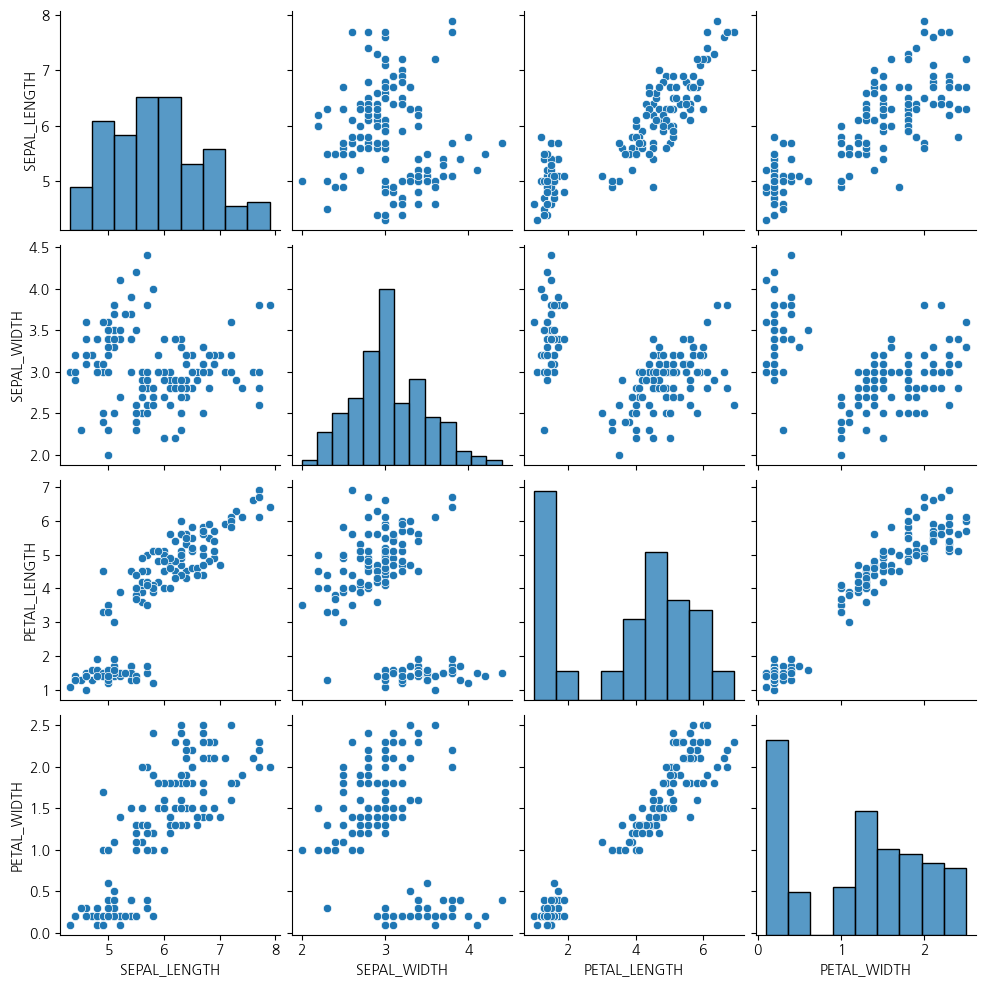

In [72]:
# 산점도 행렬
sns.pairplot(df_raw_x)

# 3,1 3,3 이 고른 것으로 판단

In [73]:
# Pearson 상관계수 : pearson, kendall, spearman
df_raw_x.corr().round(3)

# SEPA_LENGTH는 0.872, 0.818과 상관관계가 높다.
# PETAL_LENTH는 9.963과 상관관계가 높음

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [74]:
# 데이터 확인 및 Scaling 변환 필요 확인
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [75]:
# 변수 이름 저장
x_cols = df_raw_x.columns

# Scale 변환 : ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

# 변환된 데이터 및 형태 확인
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape :\n {}".format(nd_scaled.shape))

Scaled Data :
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape :
 (150, 4)


In [76]:
# DataFrame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [77]:
# Scale 변환 데이터 요약 통계량
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


In [90]:
# 주성분 분석 및 결과 : 고유 벡터(Eigenvector) 확인 및 해석

# 주성분 분석 데이터의 변수 이름
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

# 주성분 Prin 1 ~ 6까지의 고유벡터 저장
# 전치 결과 pd.DataFrame(pca.components_, columns = ["Prin1", "Prin2", "Prin3", "Prin4",])], axis = 1)
# 파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영(전치)
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T,
                columns = ["Prin1", "Prin2", "Prin3", "Prin4"])], axis = 1)
df_eigenvector.round(3)

# 고유값 확인 및 주성분 해석
# : 1주성분은 배움 기회와 승진 간의 음의 연관성
# : 2주성분은 불만처리와 특권 허용 간의 양의 연관성 확인
# 분석가에 따라 다른 그룹 생성 및 해석 가능

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,0.521,0.377,-0.720,-0.261
1,SEPAL_WIDTH,-0.269,0.923,0.244,0.124
2,PETAL_LENGTH,0.580,0.024,0.142,0.801
3,PETAL_WIDTH,0.565,0.067,0.634,-0.524


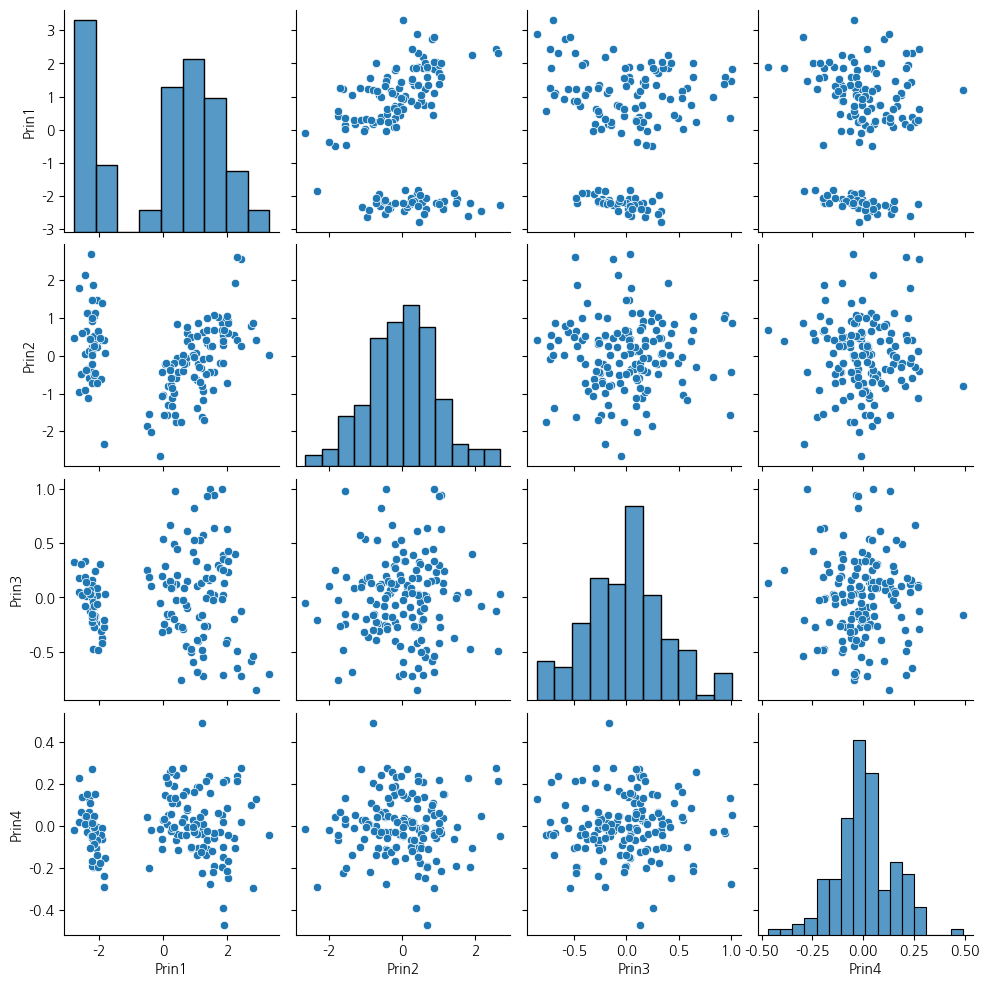

In [91]:
# 주성분 상관 / 회귀분석 : 상관관계

# 산점도 행렬
sns.pairplot(df_pca)

In [92]:
# 상관계수
df_pca.corr().round(3)

# 주성분은 서로 독립적, 상관계수 = 0

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,0.0,-0.0
Prin3,-0.0,0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0


In [120]:
# 연습 : 주성분 상관 / 회귀분석 : 회귀분석
# 다중선형 회귀분석 : 원척 데이터 활용
# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)

# speices는 문자열이기 때문에 회귀 모델에 적합하려면 동일한 형식이어야 한다
# 즉, 숫자 형식으로 바꿔야지 작동이 된다. 그래서 문자열을 숫자로 변환한다.
df_raw_y_numeric = pd.factorize(df_raw_y)[0]

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y_numeric, df_raw_x_const)

# 회귀모델 적합
reg_model = reg_model.fit()

# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           8.46e-83
Time:                        02:37:32   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1865      0.205      0.910   

In [95]:
# p247 실습
# 연습에서 생성한 미국 달러 데이터(df_USD)를 이용하여 달러(USD)의 변화 추세를 확인하고 시계열 분석을 이용하여
# 미래의 환율 변동을 확인하시오
# 데이터 : df_USD

# 1. 데이터 구성하기
# 2. 변동 추세 확인
# 3. 시계열 분석 - 정상성 확인 / 자기상관성 확인
# 4. 예측 및 결과 해석

!pip install pmdarima # auto arima 실행을 위한 pmdarima 패키지 설치

import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np # 행렬 연산
import matplotlib # 데이터 시각화
import matplotlib.pyplot as plt

from datetime import datetime # 날짜 데이터 생성

import statsmodels.api as sm # 선형 회귀분석 (절편(intercept) 추가)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # 자기상관 함수, 부분 자기상관 함수

from statsmodels.tsa.arima.model import ARIMA # ARIMA

from pmdarima import auto_arima # auto_arima

import warnings # 폰트체크 경고 무시
warnings.filterwarnings('ignore')

In [96]:
# 한글폰트
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [97]:
# 데이터 구성하기

# 파일명, 변수, 값 등에 한글 포함시 encoding="euc-kr" 지정, parse_dates : 날짜 변수 식별
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/환율.csv", parse_dates = ["APPL_DATE"])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


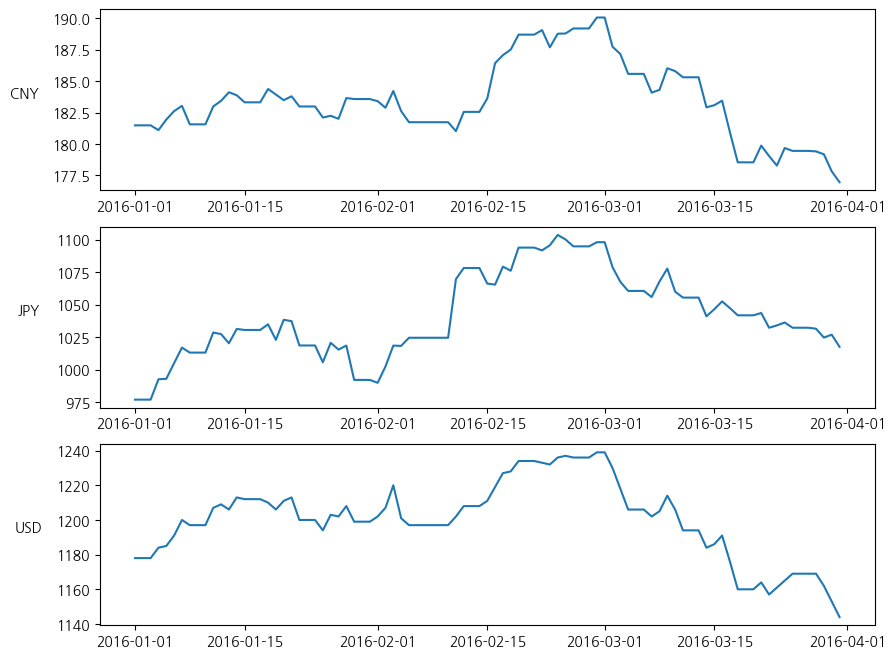

In [98]:
# 변동 추세 확인 - 시간에 따른 환율 추세 그래프 생성

# 달러와 엔화 / 중국 위엔화 단위 크기가 다르기 때문에 각각 그래프를 생성 -> 3행 1열, 크기 : (10, 8)
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 8))

# zip 함수를 사용하면 zip 함수 안의 리스트들을 하나씩 출력
# 1번 loop : ax1, 31,, "CNY"
# 2번 loop : ax2, 312, "JPY"
# 3번 loop : ax3, 313, "USD":
for (ax, idx, currency) in zip([ax1, ax2, ax3], [311, 312, 313], ["CNY", "JPY", "USD"]):
    # plot 추가, 311 -> 3행 1열의 1번 그래프
    ax.plot("APPL_DATE", "STD_RATE", data = df_raw[df_raw["CURRENCY"] == currency])
    # y축에 통화 표시 rotation : label 가로로 생성, labelpad : label과 그래프 사이의 거리
    ax.set_ylabel(currency, rotation = 0, labelpad = 20)

In [101]:
# 시계열 분석 : 데이터 분할 - 통화별 데이터 분할

# USD 데이터 선택 후 APPL_DATE를 index로 설정
df_USD = df_raw[df_raw["CURRENCY"] == "USD"].set_index("APPL_DATE")

# drop method를 이용하여 통화(CURRENCY)와 미달러 환산율(USD_CONV_DATE) 변수 제외
df_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

# JPY 데이터 생성
df_JPY = df_raw[df_raw["CURRENCY"] == "JPY"].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

# CNY 데이터 생성 : 실습용 데이터
df_CNY = df_raw[df_raw["CURRENCY"] == "CNY"].set_index("APPL_DATE")
df_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_USD.head()

,STD_RATE
APPL_DATE,
2016-01-01,1178.0
2016-01-02,1178.0
2016-01-03,1178.0
2016-01-04,1184.0
2016-01-05,1185.0


In [102]:
# p237 연습
# 시계열 분석 : 데이터 분할 - train / test 데이터 분할

# train & test 데이터 분할 : 비율 기준 mask 지정
train_size = 0.9
len_idx = len(df_USD.index)
mask = (np.arange(len_idx) / len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [103]:
# P237 연습
# mask를 이용한 데이터 분할
df_USD_train = df_USD[mask]
df_USD_test = df_USD[~mask]

print("shape of train data: {}".format(df_USD_train.shape))
print("shape of test data: {}".format(df_USD_test.shape))

shape of train data: (82, 1)
shape of test data: (9, 1)


In [104]:
# 추가 설명 : train & test 데이터 분할 : index 직접 지정
df_USD_train = df_USD[df_USD.index <= "2016-03-22"]
df_USD_test = df_USD[df_USD.index > "2016-03-22"]
df_USD_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,1161.0
2016-03-24,1165.0
2016-03-25,1169.0
2016-03-26,1169.0
2016-03-27,1169.0


<Axes: xlabel='APPL_DATE'>

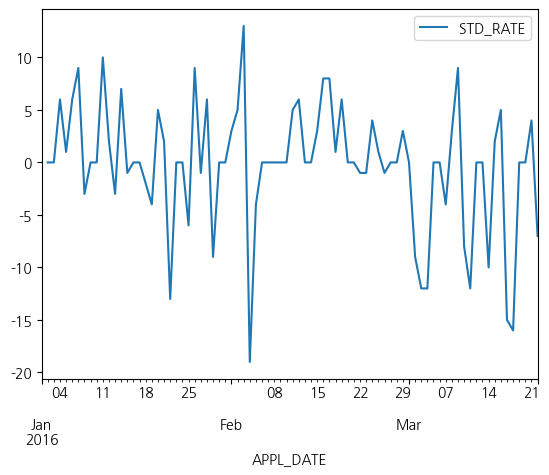

In [105]:
# 시계열 분석 : 데이터 분할 - 차분을 통하여 정상성 데이터로 변환

# 1차 차분 : Z(t) - Z(t-1)
# shift(n) : 앞의 n번 쨰 행의 데이터를 가져옴 
df_USD_diff1 = df_USD_train - df_USD_train.shift(1)
df_USD_diff1.plot()

<Axes: xlabel='APPL_DATE'>

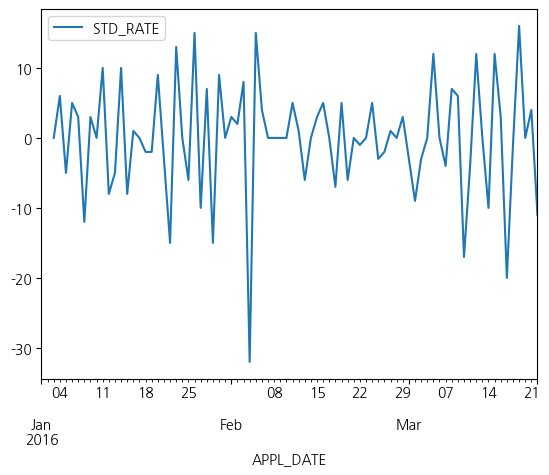

In [106]:
# 2차 차분 : (z(t) - z(t-1)) - (z(t-1) - z(t-2)) = z(t) - 2*z(t-1) + z(t-2)
df_USD_diff2 = df_USD_train - 2 * (df_USD_train.shift(1)) + (df_USD_train.shift(2))
df_USD_diff2.plot()

# [1차 차분] = 원 데이터보다는 시간의 흐름에 영향을 덜 받지만 정상성이 만족스럽지 않음
# [2차 차분] = 으로 시간에 따른 경향성을 가지지 않는 정상성을 만족

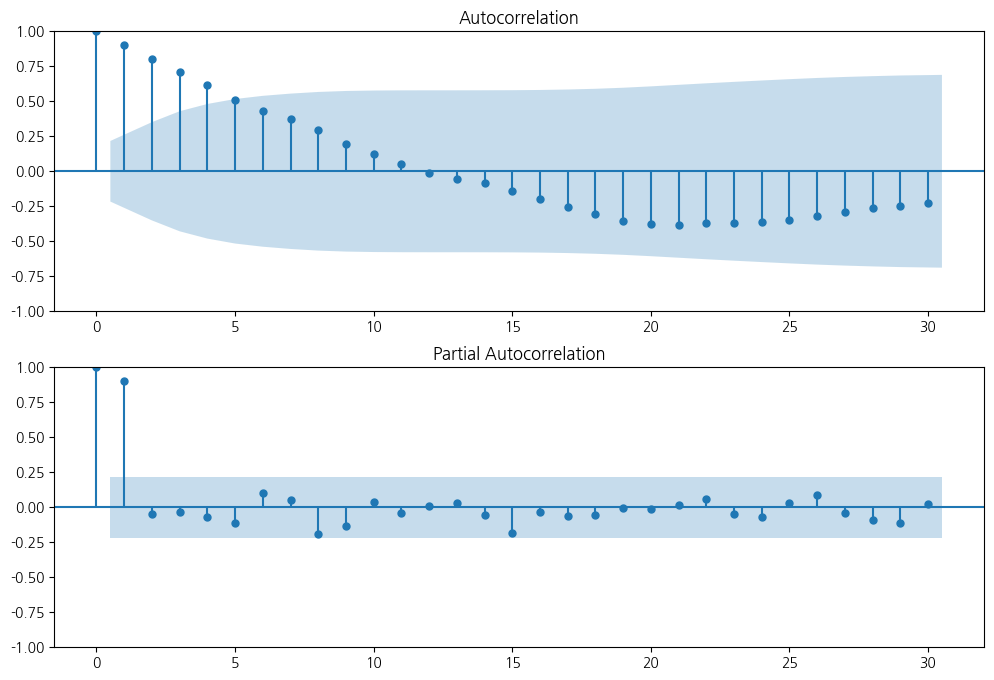

In [107]:
# 시계열 분석 - 자기상관 함수 및 부분 자기상관 함수
# -> Lag를 30까지 하여 ACF, PACF 산출

# 자기회귀 최대 p기간 지정
lag_size = 30
fig = plt.figure(figsize = (12, 8))

# acf 그래프를 그릴 공간 생성
ax1 = fig.add_subplot(211)

# 자기상관 함수 그래프 plot_acf 함수 사용
fig = plot_acf(df_USD_train["STD_RATE"], lags=lag_size, ax=ax1)

# pacf 그래프를 그릴 공간 생성
ax2 = fig.add_subplot(212)

# 부분 자기상관 함수 그래프 plot_pacf 함수 사용
fig = plot_pacf(df_USD_train["STD_RATE"], lags=lag_size, ax=ax2)

# ACF는 지속적으로 감소하고 p=13 시점에서 양에서 음으로 변하고, PACF는 p=1 시점에서 0.9보다 크고 이후 급격히 감소(절단면)함.
# 따라서 p = 1, q = 0 모델이 적당하다고 판단 -> ARMA(1, 0)

In [108]:
# 시계열 분석 - 시계열 모델

# Train 데이터 이용. AR(1), I(2, 차분), MA(0)인 ARIMA 모델
ts_model_usd = ARIMA(df_USD_train, order = (1, 2, 0)) # (p, d, q) 지정

ts_result_usd = ts_model_usd.fit() # 데이터 적합
print(ts_result_usd.summary())

# ARIMA(1, 2, 0) 모델의 계수 유의성 확인

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -274.804
Date:                Thu, 08 Aug 2024   AIC                            553.608
Time:                        02:27:58   BIC                            558.372
Sample:                    01-01-2016   HQIC                           555.518
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3764      0.124     -3.047      0.002      -0.618      -0.134
sigma2        56.2767      7.107      7.919      0.000      42.348      70.206
Ljung-Box (L1) (Q):                   2.21   Jarque-

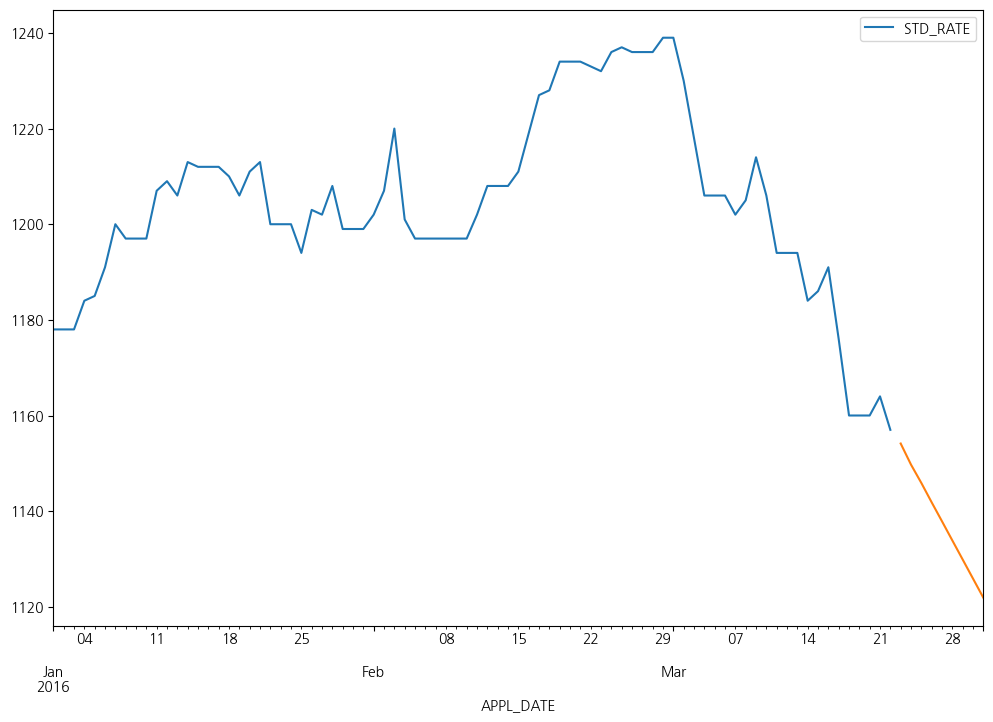

In [109]:
# 예측 및 결과 해석

# 예측 시작 / 종료 날짜 지정
start_time = df_USD_test.index.min() # 2016-03-23
end_time = df_USD_test.index.max() #2016-03-31
fig, ax = plt.subplots(figsize = (12, 8))

# 예측 전까지 데이터
ax = df_USD_train.plot(ax = ax)

# 예측 그래프 생성 함수, start : 예측 시작, end : 예측 종료, plot_insample : 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_usd.predict(start = start_time, end = end_time, ax = ax, plot_insample = False).plot()

# 2016년 3월 23일 ~ 31일까지의 예측값 -> 지속적으로 감소할 것으로 예측

In [110]:
# 예측 및 결과 해석

# 전체 기간의 실제값, 예측값 확인
start_time = pd.to_datetime("2016-01-03") # 차분=2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_usd.predict(start = start_time, end = end_time, typ = 'levels')
df_merge = df_USD # 실제값 저장
df_merge["예측값"] = y_pred # 예측값 저장 및 변수명 지정
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178.0,NaN
2016-01-02,1178.0,NaN
2016-01-03,1178.0,1178.029066
2016-01-04,1184.0,1178.000000
2016-01-05,1185.0,1187.741796


<Axes: xlabel='APPL_DATE'>

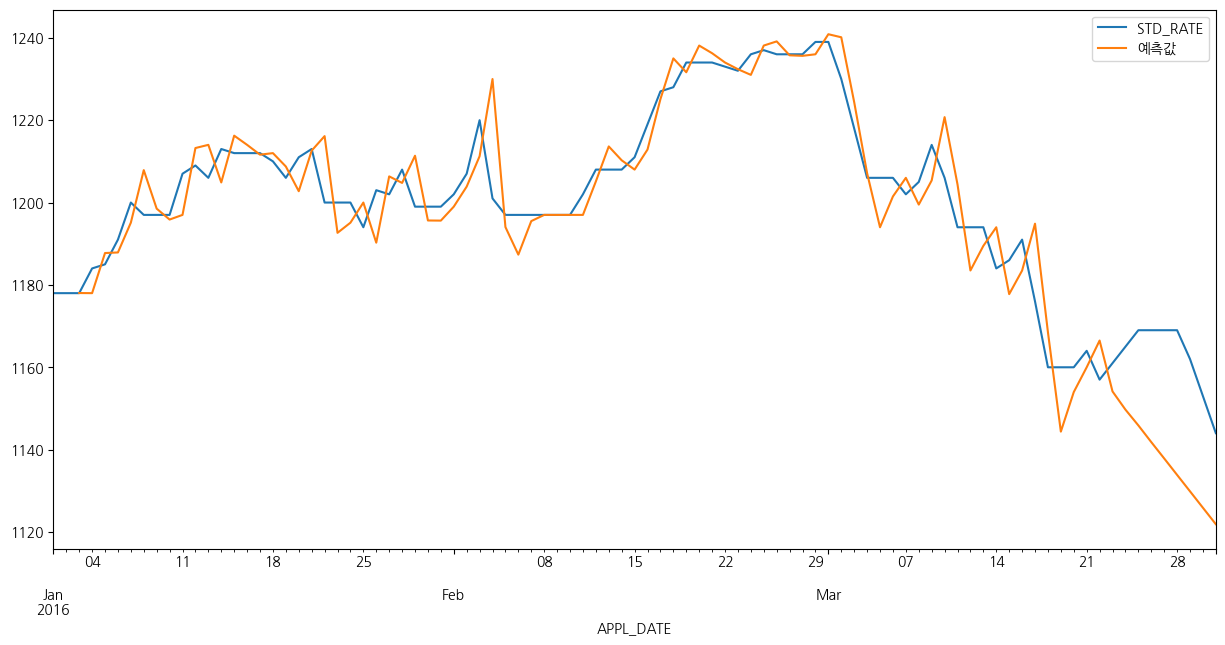

In [111]:
# 추세 그래프 생성 및 확인
df_merge.plot(y=["STD_RATE", "예측값"], figsize=(15,7))

# 모델 훈련구간은 실제값 대비 지연(lag) 현상이 확인되며 예측 구간은 오차가 큼

In [112]:
# (ARIMA 모수(p, d, q) 도출을 Grid_search지원 패키지 auto_arima 적용시)

# 시계열 분석 - 시계열 모델

# 최적의 모수(p, q) 찾기 위한 auto_arima 적용
ts_model = auto_arima(df_USD_train, max_p = 3, max_q = 3, d = 2, trace = True, error_action = 'ignore')

# 최적의 모수 ARIMA(0, 2, 1) 확인

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=524.467, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=563.701, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=553.608, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=521.789, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.560, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=523.412, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=524.524, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.468 seconds


In [113]:
# Train 데이터 이용. AR(0), I(2, 차분), MA(1)인 ARIMA 모델
ts_model_usd = ARIMA(df_USD_train, order = (0, 2, 1)) # (p, d, q) 지정

# 데이터 적합
ts_result_usd = ts_model_usd.fit()
print(ts_result_usd.summary())

# ARIMA(0, 2, 1) 모델의 계수 유의성 확인

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -258.895
Date:                Thu, 08 Aug 2024   AIC                            521.789
Time:                        02:30:11   BIC                            526.553
Sample:                    01-01-2016   HQIC                           523.699
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9220      0.053    -17.368      0.000      -1.026      -0.818
sigma2        36.9957      4.740      7.805      0.000      27.705      46.286
Ljung-Box (L1) (Q):                   0.06   Jarque-

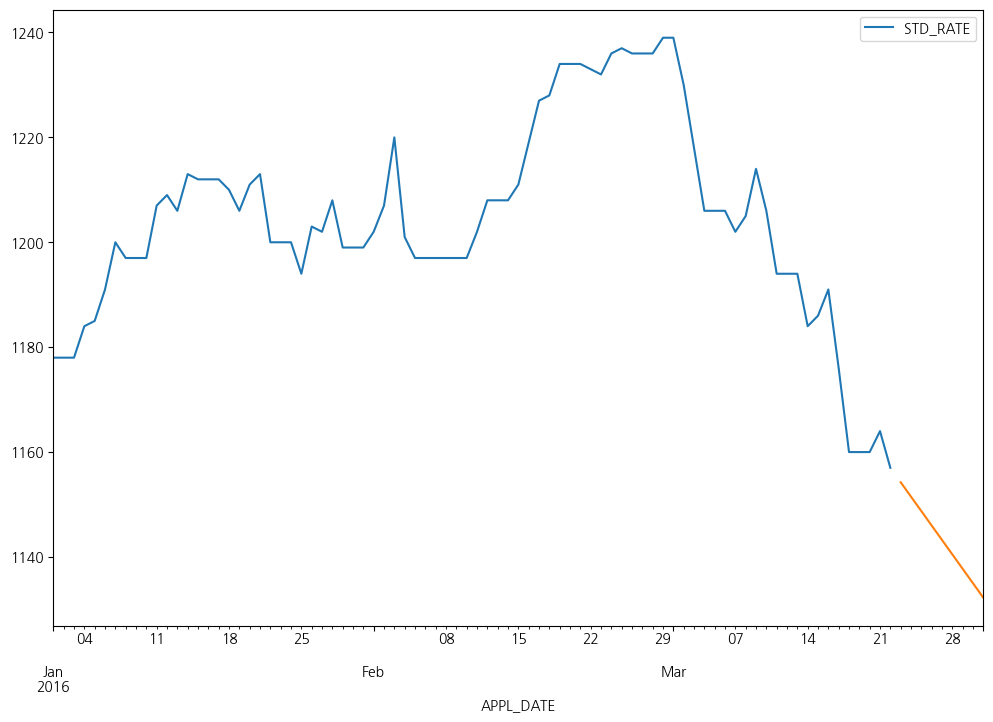

In [114]:
# 예측 및 결과 해석

# 예측 시작 / 종료 날짜 지정
start_time = df_USD_test.index.min() # 2016-03-23
end_time = df_USD_test.index.max() # 2016-03-31
fig, ax = plt.subplots(figsize = (12, 8))

# 예측 전까지 데이터
ax = df_USD_train.plot(ax = ax)

# 예측 그래프 생성 함수, start : 예측 시작, end : 예측 종료, plot_insample : 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_usd.predict(start = start_time, end = end_time, ax = ax, plot_insample = False).plot()

# 2016년 3월 23일 ~ 31일까지의 예측값 -> 지속적으로 감소할 것으로 예측

In [115]:
# 전체 기간의 실제값, 예측값 확인
start_time = pd.to_datetime("2016-01-03") # 차분 = 2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_usd.predict(start = start_time, end = end_time, typ = 'levels')
df_merge = df_USD # 실제값 저장
df_merge["예측값"] = y_pred # 예측값 저장 및 변수명 지정
df_merge.head()

# 모델 훈련구간은 실제값 대비 지연(lag) 현상이 확인되며 예측 구간은 오차가 큼

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178.0,NaN
2016-01-02,1178.0,NaN
2016-01-03,1178.0,1178.040179
2016-01-04,1184.0,1178.020024
2016-01-05,1185.0,1186.035078


<Axes: xlabel='APPL_DATE'>

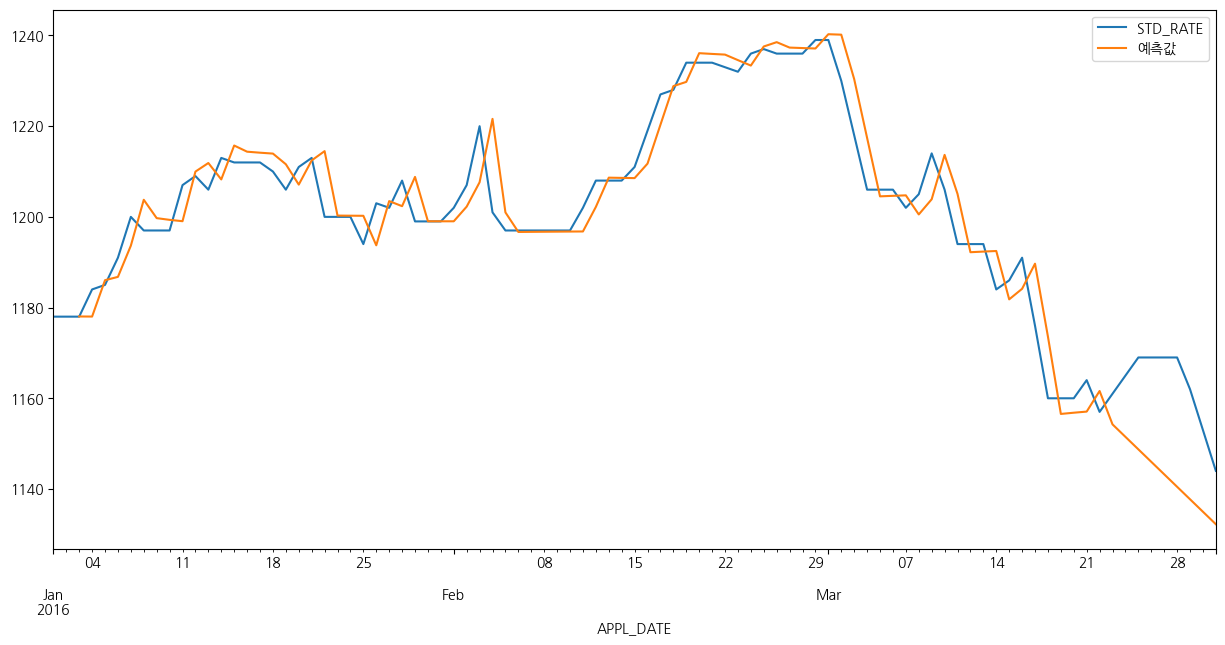

In [116]:
# 추세 그래프 생성 및 확인
df_merge.plot(y=["STD_RATE", "예측값"], figsize = (15, 7))